# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.011756e+01     7.489880e+00
 * time: 0.003228902816772461
     1     2.942871e+01     4.734436e+00
 * time: 0.014668941497802734
     2     2.050073e+01     4.884496e+00
 * time: 0.02856898307800293
     3     1.544438e+01     4.238114e+00
 * time: 0.042327880859375
     4     1.127622e+01     1.853671e+00
 * time: 0.056520938873291016
     5     1.103749e+01     3.468602e+00
 * time: 0.06806087493896484
     6     1.033280e+01     1.400468e+00
 * time: 0.07961797714233398
     7     9.485154e+00     1.297567e+00
 * time: 0.09140586853027344
     8     8.952843e+00     1.353183e+00
 * time: 0.10300302505493164
     9     8.638137e+00     1.234704e+00
 * time: 0.11458683013916016
    10     8.442931e+00     9.506704e-01
 * time: 0.1259899139404297
    11     8.310440e+00     8.008865e-01
 * time: 0.13795185089111328
    12     8.151957e+00     5.788211e-01
 * time: 0.15003299713134766
    13     8.081993e+00     2.268084e-01
 * time:

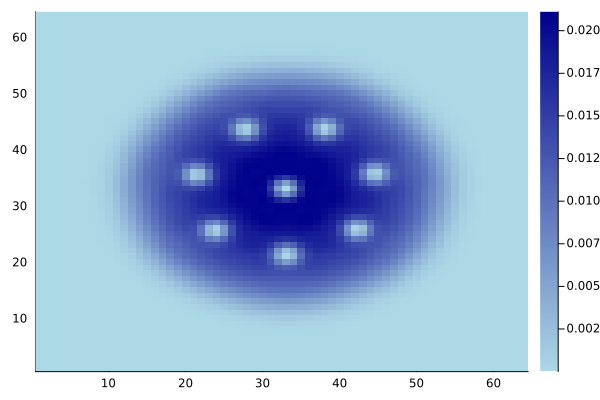

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)